In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Convolutional Neural Network

##### Kelompok Terserah : 

| Nama                       | NRP        |
| -------------------------- | ---------- |
| Muhammad Abrol AL Qushoyyi | 5025201028 |
| Moh. Ilham Fakhri Zamzami  | 5025201275 |
| Arief Badrus Sholeh        | 5025201228 |

##### Google Collab

https://colab.research.google.com/drive/11f5MtGaDc2MYizxn7b5X5RQP1b6bjs8u#scrollTo=xRxTzUv6Kc0W

##### Dataset

Dataset yang digunakan adalah dataset untuk *Arabic Handwritten Characters*

https://www.kaggle.com/datasets/mloey1/ahcd1

https://www.kaggle.com/code/bbloggsbott/understanding-convolutional-neural-network

#### 1. Import library & dataset

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #plotting graphs
import seaborn as sns #plotting but with better formatiing and more variety
import tensorflow as tf
from tensorflow import keras

%matplotlib inline
tf.__version__

'2.9.2'

In [ ]:
#training data
X_train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/csvTrainImages 13440x1024.csv", header=None)
y_train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/csvTrainLabel 13440x1.csv", header=None)

#test data
X_test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/csvTestImages 3360x1024.csv", header=None)
y_test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/csvTestLabel 3360x1.csv", header=None)

#verifying load
print(X_train.shape, '\t', X_test.shape)
print(y_train.shape, '\t', y_test.shape)

(13440, 1024) 	 (3360, 1024)
(13440, 1) 	 (3360, 1)


#### 2. Data Preprocessing

In [ ]:
X_train = X_train.to_numpy().reshape(-1,32,32,1)
y_train = y_train.to_numpy()
X_test = X_test.to_numpy().reshape(-1,32,32,1)
y_test = y_test.to_numpy()

print(X_train.shape, '\t', X_test.shape)

X_train = X_train / 255.0
y_train = y_train - 1
X_test = X_test / 255.0
y_test = y_test - 1

(13440, 32, 32, 1) 	 (3360, 32, 32, 1)


> Nilai piksel berada di antara 0 hingga 255 dan nilai label berada di antara 1 dan 28. Kita perlu memodifikasi piksel sedemikian rupa sehingga nilainya berada di antara 0 dan 1 serta memodifikasi label sehingga berada di antara 0 dan 27, seperti yang diharapkan untuk operasi lebih lanjut. Selain itu, kami mengonversi kumpulan data menjadi larik numpy dan membentuknya kembali menjadi format (tidak ada sampel, lebar, tinggi, tidak ada saluran) seperti yang diharapkan oleh model TensorFlow.

__Defining Arabic Characters Label__

In [ ]:
chars = ["ا","ب","ت","ث","ج","ح","خ","د","ذ","ر","ز","س","ش","ص","ض","ط","ظ","ع","غ","ف","ق","ك","ل","م","ن","ه","و","ي"]

chars = dict(zip(np.arange(0,len(chars)), chars))
chars

{0: 'ا',
 1: 'ب',
 2: 'ت',
 3: 'ث',
 4: 'ج',
 5: 'ح',
 6: 'خ',
 7: 'د',
 8: 'ذ',
 9: 'ر',
 10: 'ز',
 11: 'س',
 12: 'ش',
 13: 'ص',
 14: 'ض',
 15: 'ط',
 16: 'ظ',
 17: 'ع',
 18: 'غ',
 19: 'ف',
 20: 'ق',
 21: 'ك',
 22: 'ل',
 23: 'م',
 24: 'ن',
 25: 'ه',
 26: 'و',
 27: 'ي'}

__Converting the labels into categorical type__

In [ ]:
from keras.utils.np_utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train.shape, '\t', y_test.shape)

(13440, 28) 	 (3360, 28)


#### 3. Splitting the Dataset

> Karena kita sudah memiliki dataset test, data train hanya perlu dipisahkan untuk memberikan set validasi. Rasio pembagian dipilih menjadi 9:1.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=0)
print(X_train.shape, '\t', X_test.shape)
print(y_train.shape, '\t\t', y_test.shape)

(12096, 32, 32, 1) 	 (3360, 32, 32, 1)
(12096, 28) 		 (3360, 28)


#### 4. Building the CNN Model

In [ ]:
model = keras.models.Sequential()

model.add(keras.layers.Conv2D(64, 5, activation='relu', input_shape=(32,32,1), padding="same"))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Conv2D(128, 3, activation='relu', padding="same"))
model.add(keras.layers.Conv2D(128, 3, activation='relu', padding="same"))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Conv2D(64, 3, activation='relu', padding="same"))
model.add(keras.layers.Conv2D(64, 3, activation='relu', padding="same"))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(28, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1664      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 128)        0

In [ ]:
model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
checkpoint = keras.callbacks.ModelCheckpoint('model1.h5', save_best_only=True)
earlystop = keras.callbacks.EarlyStopping(patience=10, monitor='val_accuracy', restore_best_weights=True)

In [ ]:
history = model.fit(x=X_train, y=y_train, batch_size=32, epochs=100, validation_data=(X_val, y_val), callbacks=[checkpoint, earlystop])

Epoch 1/100
378/378 [==============================] - 12s 7ms/step - loss: 0.9920 - accuracy: 0.6856 - val_loss: 6.5068 - val_accuracy: 0.0439
Epoch 2/100
378/378 [==============================] - 2s 6ms/step - loss: 0.2653 - accuracy: 0.9166 - val_loss: 2.0709 - val_accuracy: 0.5372
Epoch 3/100
378/378 [==============================] - 3s 7ms/step - loss: 0.1532 - accuracy: 0.9517 - val_loss: 1.1034 - val_accuracy: 0.7448
Epoch 4/100
378/378 [==============================] - 3s 7ms/step - loss: 0.1175 - accuracy: 0.9616 - val_loss: 0.2233 - val_accuracy: 0.9219
Epoch 5/100
378/378 [==============================] - 3s 8ms/step - loss: 0.0944 - accuracy: 0.9705 - val_loss: 0.2351 - val_accuracy: 0.9308
Epoch 6/100
378/378 [==============================] - 2s 6ms/step - loss: 0.0865 - accuracy: 0.9729 - val_loss: 3.9522 - val_accuracy: 0.4107
Epoch 7/100
378/378 [==============================] - 2s 6ms/step - loss: 0.0723 - accuracy: 0.9773 - val_loss: 0.2589 - val_accuracy: 0.927

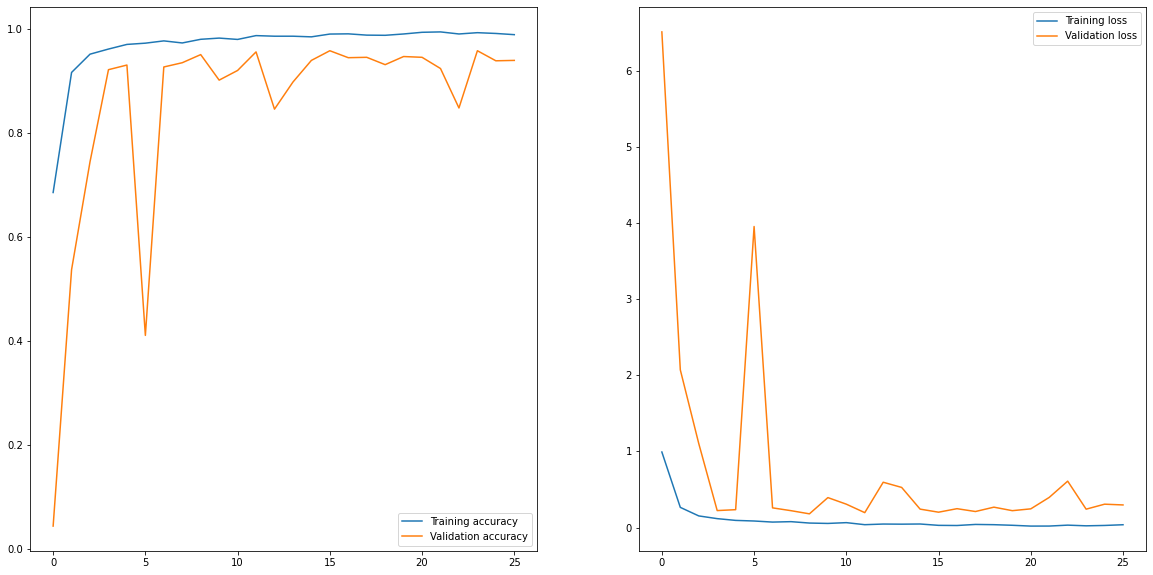

In [ ]:
fig, (a1,a2) = plt.subplots(1,2,figsize=(20,10))

a1.plot(history.history["accuracy"], label="Training accuracy")
a1.plot(history.history["val_accuracy"], label="Validation accuracy")
a1.legend()

a2.plot(history.history["loss"], label="Training loss")
a2.plot(history.history["val_loss"], label="Validation loss")
a2.legend()

plt.show()

105/105 [==============================] - 1s 5ms/step
Test Accuracy:  0.962202380952381


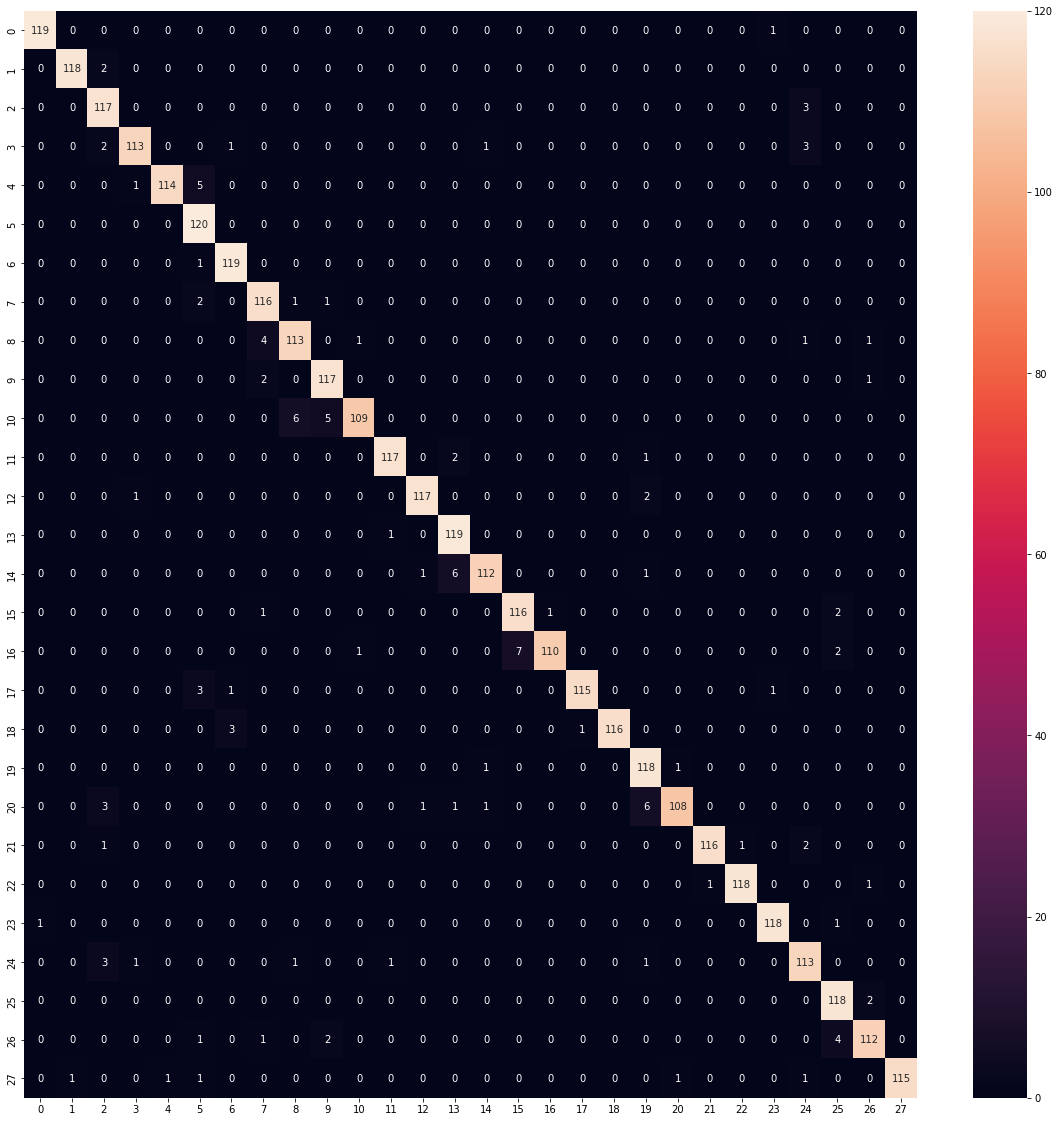

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = model.predict(X_test)
y_obs = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

test_acc = accuracy_score(y_true, y_obs)
cm = confusion_matrix(y_true, y_obs)

print("Test Accuracy: ",test_acc)
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(cm, annot=True, fmt="d", ax=ax)